In [1]:
import sys
sys.path.append('../src')

import pickle
import matplotlib.pyplot as plt
import geopandas as gpd
from geoq import geom
import geoplot as gplt
import numpy as np
from glob import glob
world = geom.get_world()
from IPython.display import Markdown


## summary information of all available chips

In [2]:
chips_geoms = gpd.read_parquet('/datasets/genai-geo-embeddings/chips.parquet')
chips_geoms.shape

(48313, 5)

In [3]:
chips_geoms.head()

,chipset_id,chip_id,season,geometry,lonlat
0,2ebd307bdaafd,00217e53ae025,winter,"POLYGON ((23.505 15.42755, 23.505 15.47379, 23...","[23.528842211411103, 15.450666195202487]"
1,356f2efa4e288,305c4716ab785,fall,"POLYGON ((54.77138 62.73265, 54.77138 62.77865...","[54.821557935421026, 62.755649953351664]"
2,1db1f5fb2866f,0ac172540e823,fall,"POLYGON ((85.51424 26.46238, 85.51424 26.50859...","[85.53991161186431, 26.485483925845262]"
3,16be5dd21ae4c,087a4afcebe35,spring,"POLYGON ((147.82412 64.53943, 147.82412 64.585...","[147.8775275593774, 64.562401914625]"
4,268b8065b9d36,1bacb25ff4da4,winter,"POLYGON ((0.87037 15.94743, 0.87037 15.99368, ...","[0.8942767029818856, 15.970550853338139]"


## show where chips are

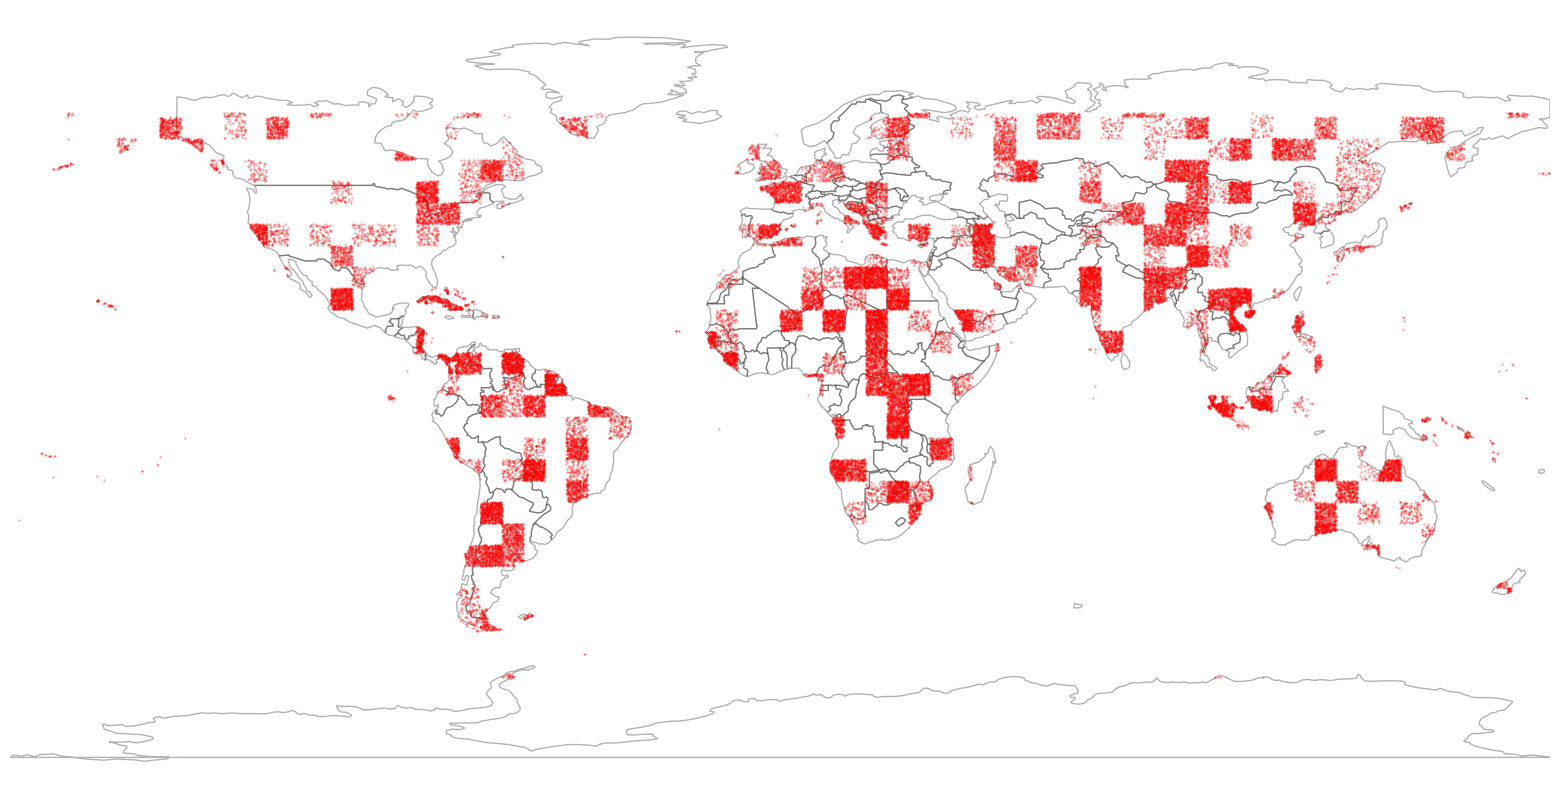

In [4]:
lonlats = np.r_[[np.r_[i] for i in chips_geoms.lonlat.values]]

ax = plt.figure(figsize=(20,10)).subplots(1,1)
gplt.polyplot(world, alpha=0.3,  ax=ax)
plt.scatter(lonlats[:,0], lonlats[:,1], color='red', alpha=.7, s=.1)

## show a random chip

In [5]:
files = glob('/datasets/genai-geo-embeddings/chips/*.pkl')
len(files)

48313

In [6]:
file = np.random.choice(files)
file

np.str_('/datasets/genai-geo-embeddings/chips/36f23cf7ceded.pkl')

In [7]:
chip_id = file.split("/")[-1].split(".")[0]
chip_id    

'36f23cf7ceded'

In [8]:
with open(file, 'rb') as f:
    z = pickle.load(f)
z.keys()

dict_keys(['chipset_id', 'chip_id', 'season', 'description', 'img', 'geometry', 'image_embedding', 'text_embedding', 'lonlat', 'description_model', 'text_embedding_model'])

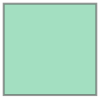

In [9]:
z['geometry']

In [10]:
z['text_embedding'], z['image_embedding'], z['description_model'], z['text_embedding_model']

(array([ 0.0188786 , -0.00372266, -0.00659663, ...,  0.00854466,
        -0.02466675, -0.01424647], shape=(3072,)),
 array([ 0.39609326, -0.62060516,  0.12904069, ..., -1.31117071,
         0.70694027,  0.38761141], shape=(1024,)),
 'gemini-2.5-flash-lite',
 'gemini-embedding-001')

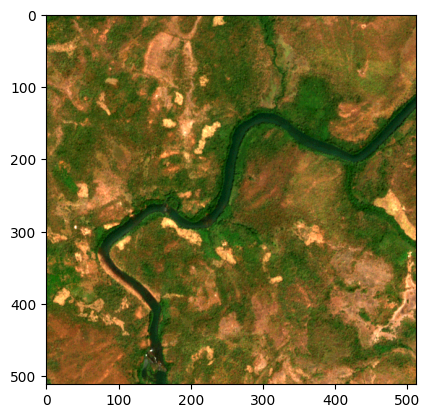

In [11]:
a,b = np.percentile(z['img'], (1,99))
plt.imshow(z['img'], vmin=a, vmax=b)

In [12]:
Markdown(z['description'])

**Dominant Land Cover:**

The image is predominantly covered by vegetation, with a significant portion also appearing as a mix of barren land and sparsely vegetated areas. Water is present in the form of a winding river.

**Terrain:**

The terrain appears to be relatively flat to gently rolling, with no prominent mountainous or canyon features visible. The landscape is characterized by undulating ground, with areas of higher elevation interspersed with lower-lying regions.

**Vegetation:**

*   **Type:** Dense green vegetation, likely forest or dense shrubland, is present throughout the image, particularly along the riverbanks.
*   **Location:** Clumps and patches of this dense vegetation are scattered across the image, with a strong concentration bordering the river.
*   **Extent:** The vegetation varies in density, with some areas appearing lush and healthy, while others are sparser.
*   **Health and Appearance:** The dominant green vegetation appears healthy and vibrant.
*   **Patterns:** The vegetation exhibits a patchy and irregular pattern, interspersed with lighter-colored areas.

**Water Bodies:**

*   **Type:** A meandering river is the most prominent water body.
*   **Location:** The river enters the image from the upper left quadrant, flows in a sinuous path towards the lower center, and then exits towards the bottom.
*   **Size/Extent:** The river is moderately wide, with clear banks.
*   **Flow Direction:** The flow appears to be generally from northwest to southeast.
*   **Shoreline Characteristics:** The shorelines are irregular and appear to be lined with vegetation.

**Man-Made Structures:**

No significant man-made structures such as buildings, roads, or urban areas are clearly discernible in this satellite image. The landscape appears predominantly natural.

**Geological Features:**

No distinct geological features like rock outcrops, fault lines, or volcanic formations are readily apparent. The surface appears to be covered by soil and vegetation.

**Other Distinctive Features:**

The most distinctive feature is the dark, winding river cutting through the green and brown landscape. The contrast between the dark water and the surrounding varied terrain is striking. The lighter patches within the vegetated areas suggest areas of exposed soil or sparser vegetation.

**Coverage estimation:**
```json
{
  "Vegetation": "70%",
  "Barren Land/Sparsely Vegetated Areas": "25%",
  "Water Bodies": "5%"
}
```
### Geographical location
```json
{
    "plus_code": "9HQ7+X7",
    "locality": "Dakakoura",
    "administrative_area_level_2": "Pr\u00e9fecture de Bok\u00e9",
    "administrative_area_level_1": "Bok\u00e9",
    "country": "Guinea",
    "coords": {
        "lon": "-14.4368",
        "lat": "11.3900"
    }
}
```
    

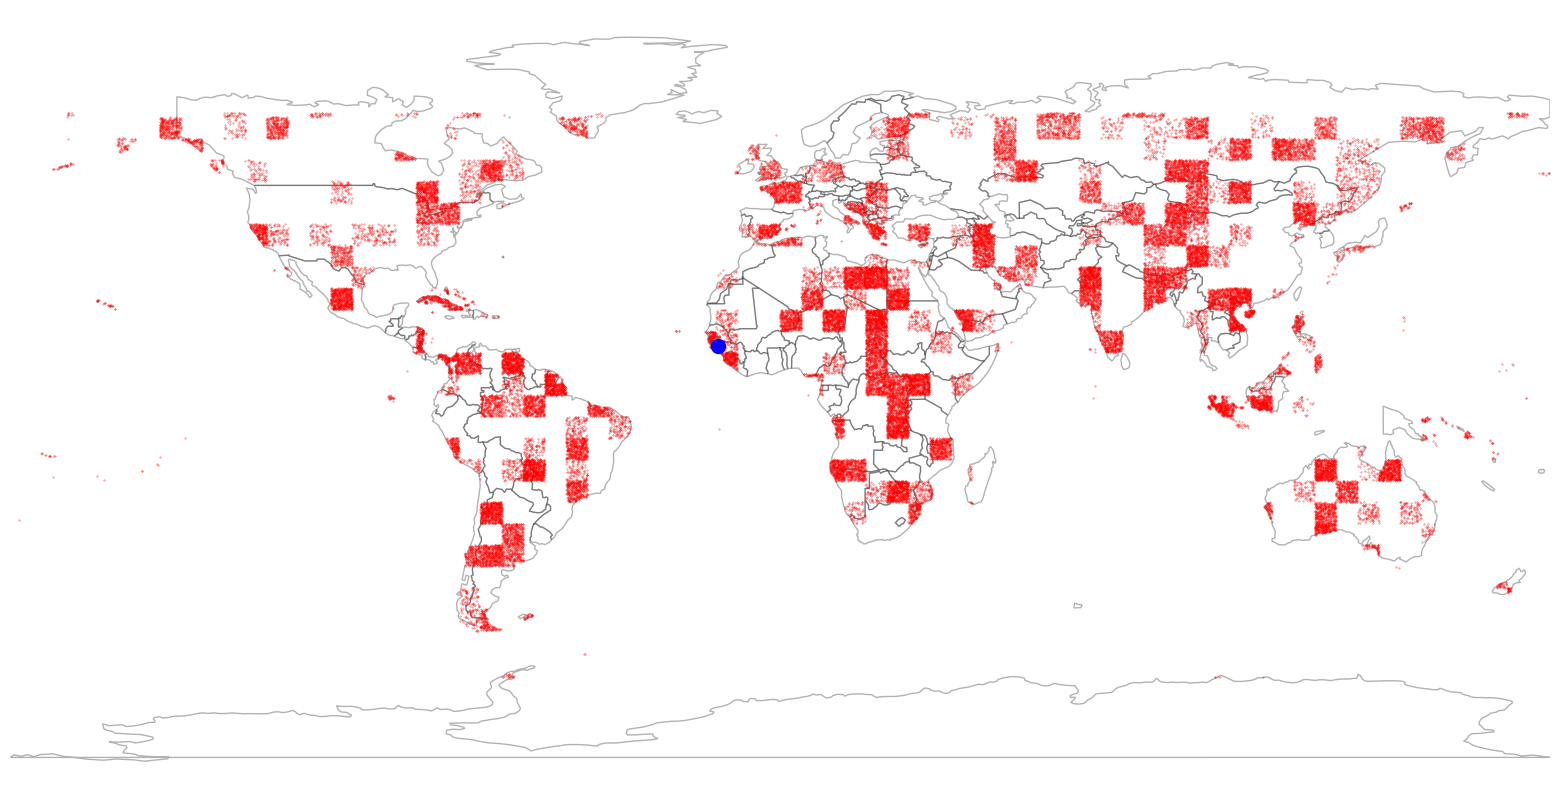

In [13]:
lonlats = np.r_[[np.r_[i] for i in chips_geoms.lonlat.values]]

ax = plt.figure(figsize=(20,10)).subplots(1,1)
gplt.polyplot(world, alpha=0.3,  ax=ax)
plt.scatter(lonlats[:,0], lonlats[:,1], color='red', alpha=.7, s=.1)
plt.scatter(*z['lonlat'], color='blue', s=100)